In [111]:
# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline
import seaborn as sns

# Model Preparation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Model Building
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
#
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Model Performance
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
pd.pandas.set_option("display.max_columns",None)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(df.shape)
print(df.isnull().sum())

(1460, 81)
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
features_with_na=[i for i in df.columns if df[i].isnull().sum()>1]

In [8]:
#Missing values:
for i in features_with_na:
    print(i,np.round(df[i].isnull().mean(),4),"% of missing values")

LotFrontage 0.1774 % of missing values
Alley 0.9377 % of missing values
MasVnrType 0.0055 % of missing values
MasVnrArea 0.0055 % of missing values
BsmtQual 0.0253 % of missing values
BsmtCond 0.0253 % of missing values
BsmtExposure 0.026 % of missing values
BsmtFinType1 0.0253 % of missing values
BsmtFinType2 0.026 % of missing values
FireplaceQu 0.4726 % of missing values
GarageType 0.0555 % of missing values
GarageYrBlt 0.0555 % of missing values
GarageFinish 0.0555 % of missing values
GarageQual 0.0555 % of missing values
GarageCond 0.0555 % of missing values
PoolQC 0.9952 % of missing values
Fence 0.8075 % of missing values
MiscFeature 0.963 % of missing values


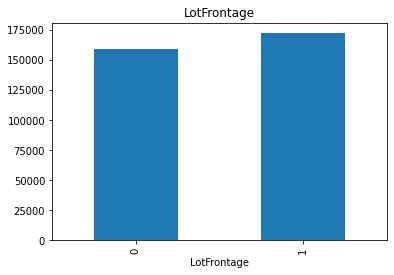

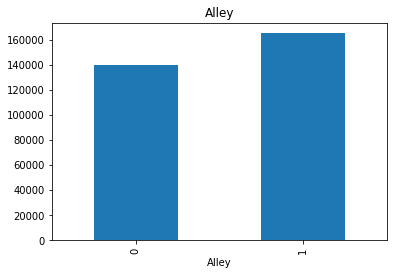

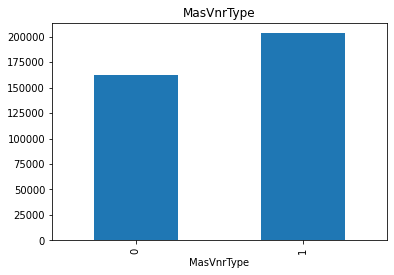

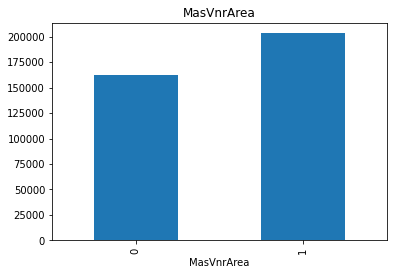

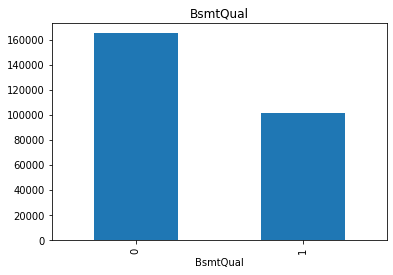

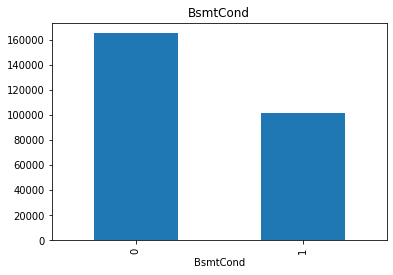

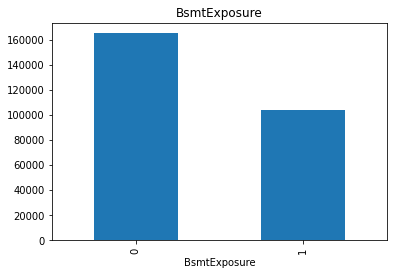

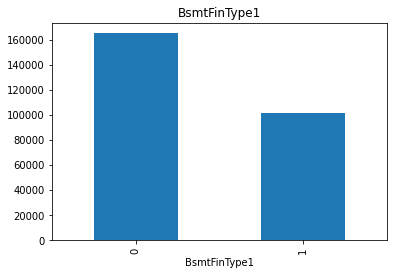

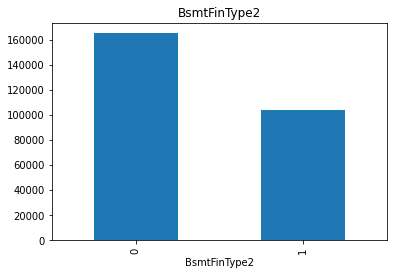

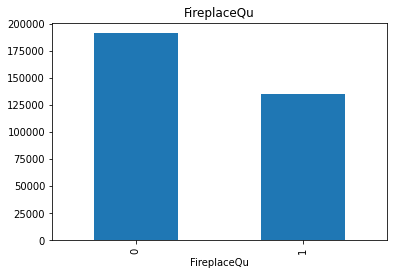

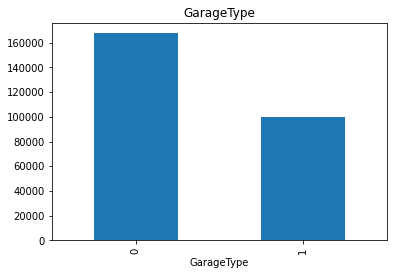

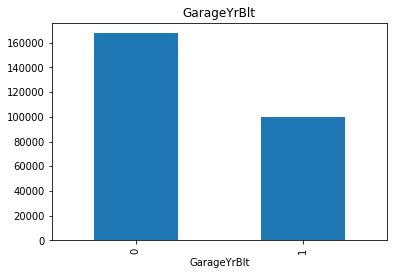

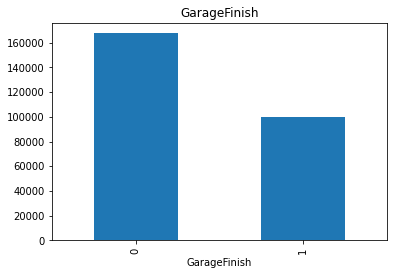

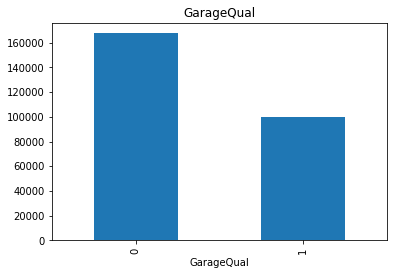

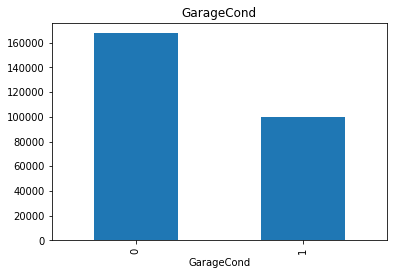

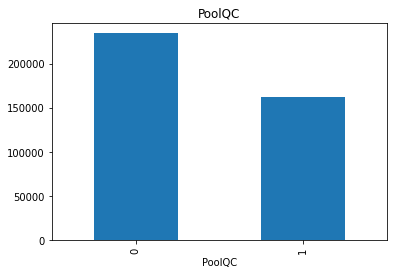

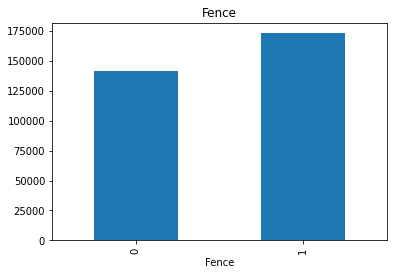

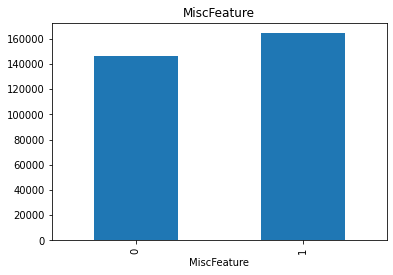

In [9]:
for features in features_with_na:
    data=df.copy()
    
    data[features]=np.where(data[features].isnull(),1,0)
    
    data.groupby(features)["SalePrice"].median().plot.bar()
    
    plt.title(features)
    
    plt.show()
    

In [10]:

#nuMERICAL VARIABLE

Numerical_features=[i for i in df.columns if df[i].dtype!="O"]
print("the len of numerical features",len(Numerical_features))
df[Numerical_features].head()

the len of numerical features 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [11]:

# list of variables that contain year information
year_feature = [feature for feature in Numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:

for features in year_feature:
    print(features,df[features].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

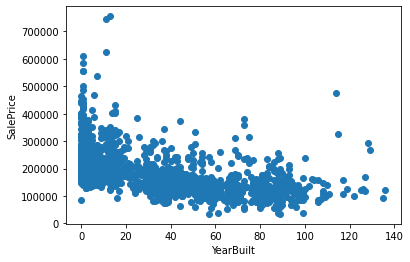

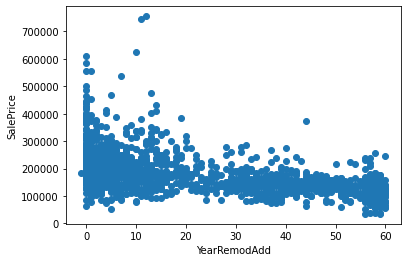

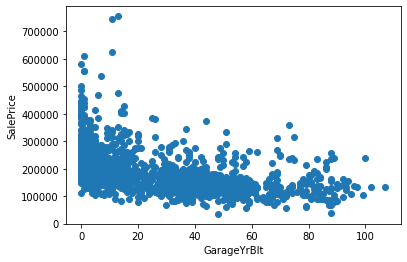

In [13]:

for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

        

In [14]:
discrete_feature=[feature for feature in Numerical_features if len(df[feature].unique())<25 and feature not in year_feature+["Id"]]

print("the lenght of discrete varaible",len(discrete_feature))

the lenght of discrete varaible 17


In [15]:
continuous_feature=[feature for feature in Numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


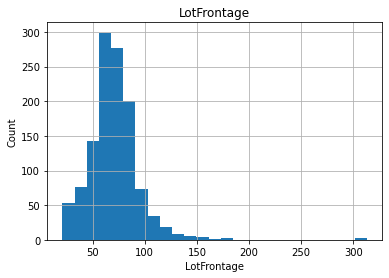

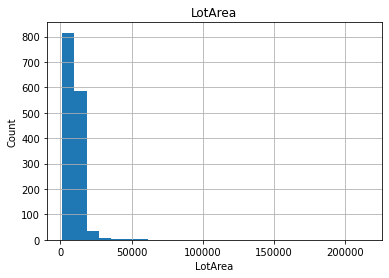

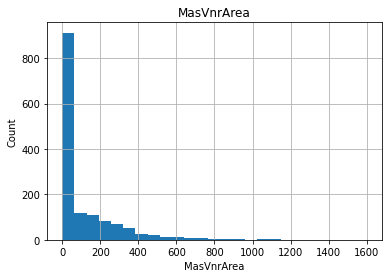

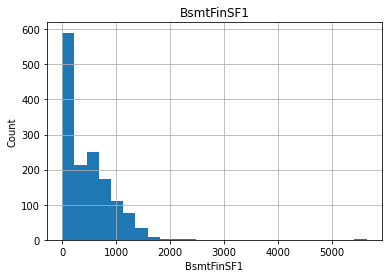

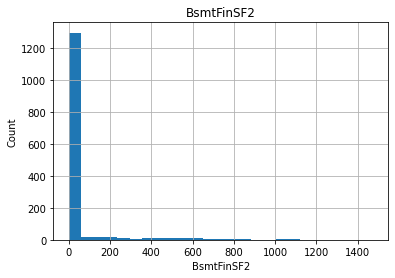

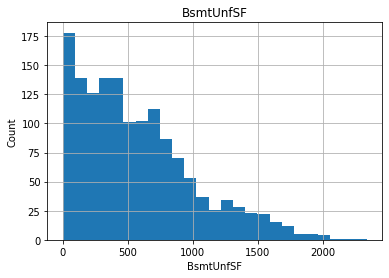

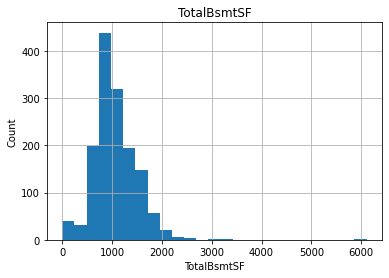

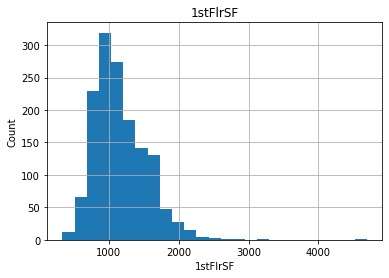

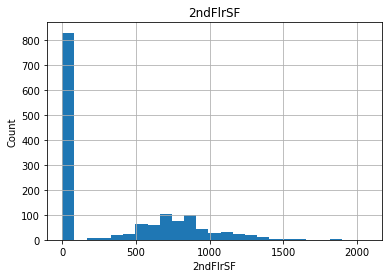

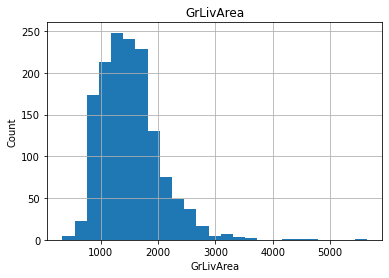

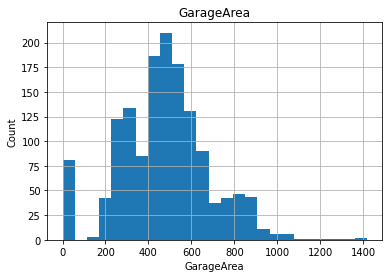

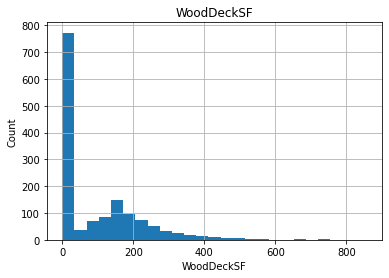

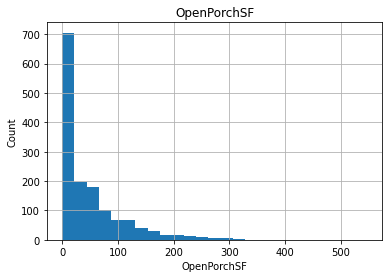

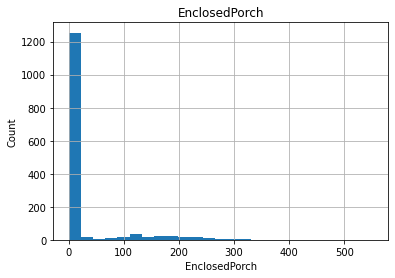

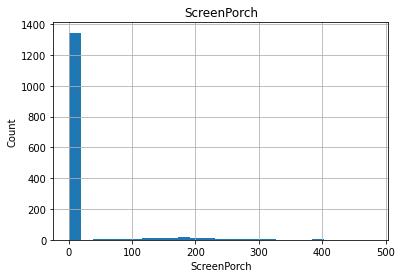

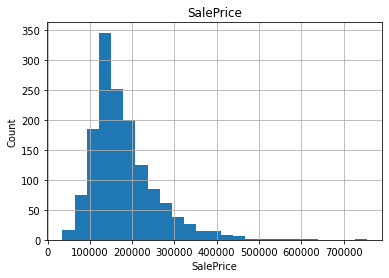

In [16]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

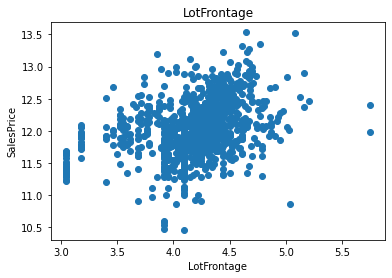

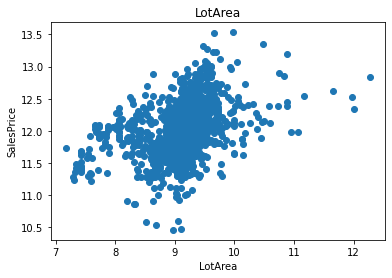

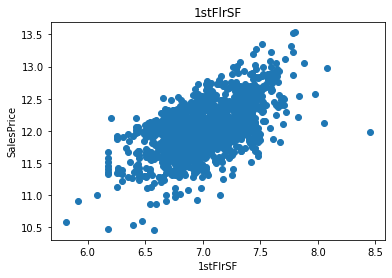

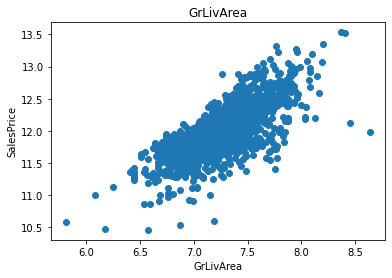

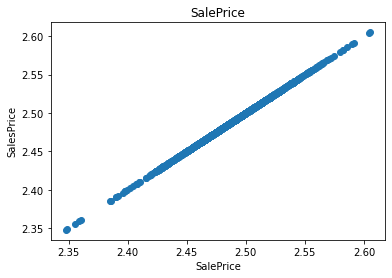

In [17]:
#log transforamtion

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

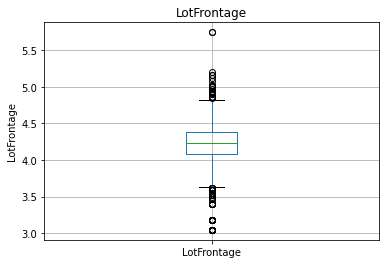

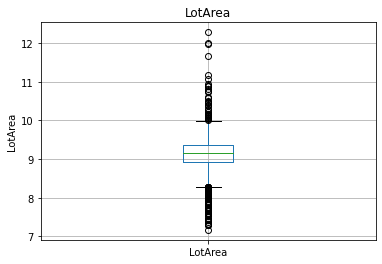

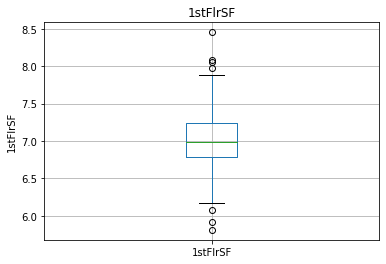

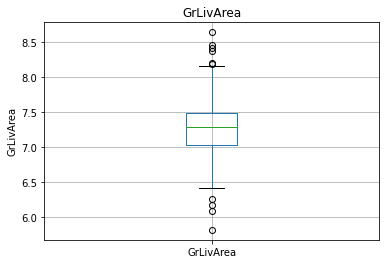

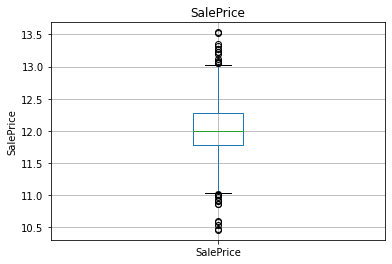

In [18]:
#outliers:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [19]:

categorical_features=[i for i in df.columns if df[i].dtype=="O"]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [20]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [21]:
for feature in categorical_features:
    print("the feature is {} and the no of categories are {}".format(feature,len(df[feature].unique())))

the feature is MSZoning and the no of categories are 5
the feature is Street and the no of categories are 2
the feature is Alley and the no of categories are 3
the feature is LotShape and the no of categories are 4
the feature is LandContour and the no of categories are 4
the feature is Utilities and the no of categories are 2
the feature is LotConfig and the no of categories are 5
the feature is LandSlope and the no of categories are 3
the feature is Neighborhood and the no of categories are 25
the feature is Condition1 and the no of categories are 9
the feature is Condition2 and the no of categories are 8
the feature is BldgType and the no of categories are 5
the feature is HouseStyle and the no of categories are 8
the feature is RoofStyle and the no of categories are 6
the feature is RoofMatl and the no of categories are 8
the feature is Exterior1st and the no of categories are 15
the feature is Exterior2nd and the no of categories are 16
the feature is MasVnrType and the no of cate

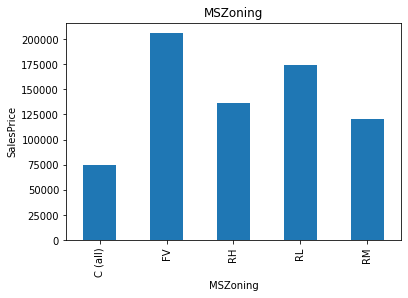

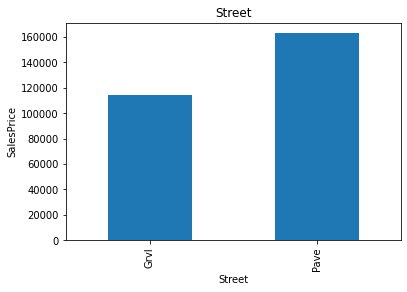

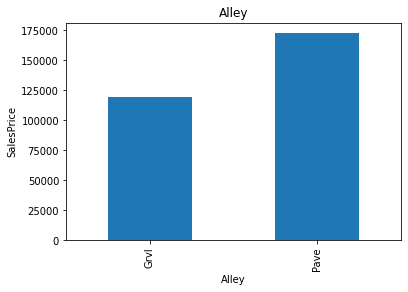

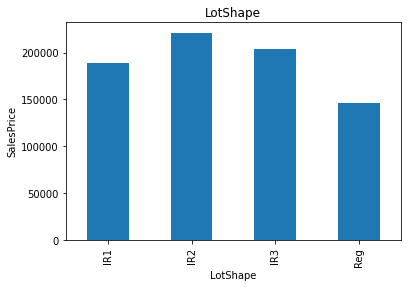

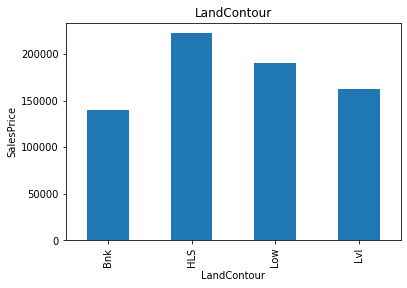

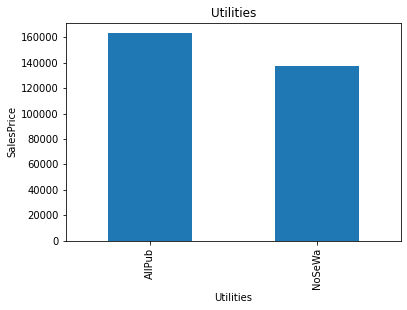

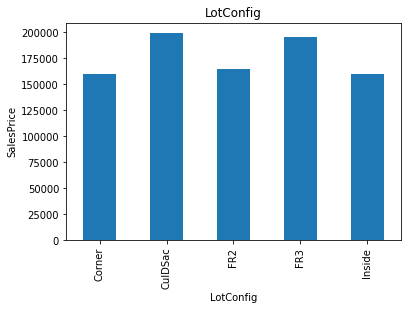

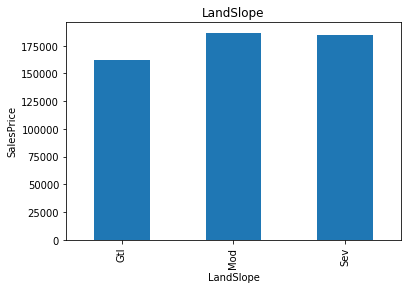

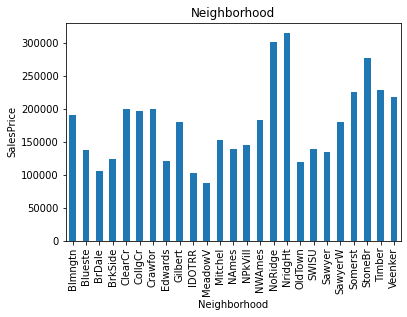

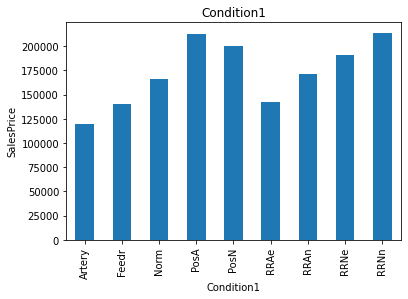

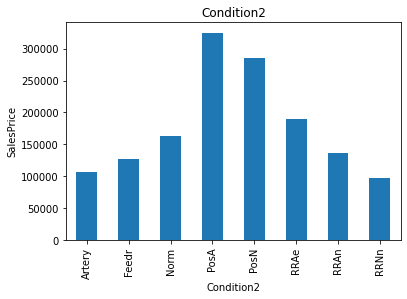

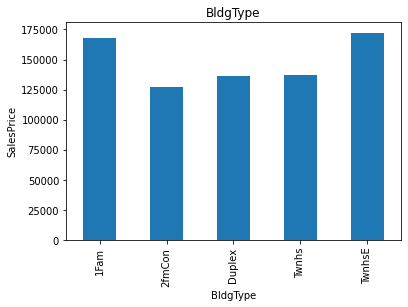

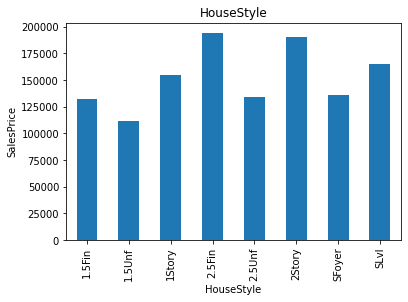

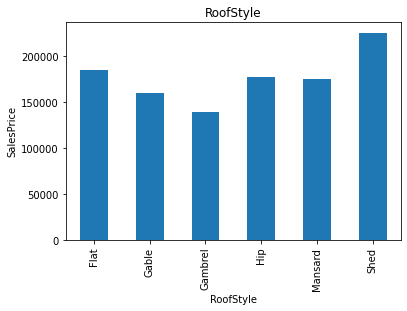

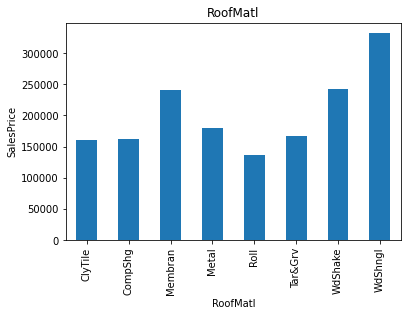

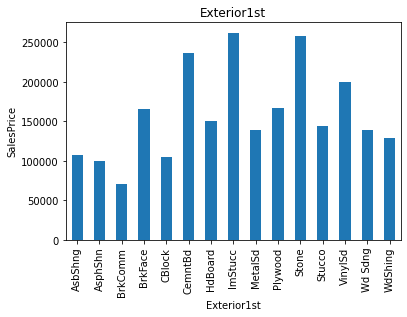

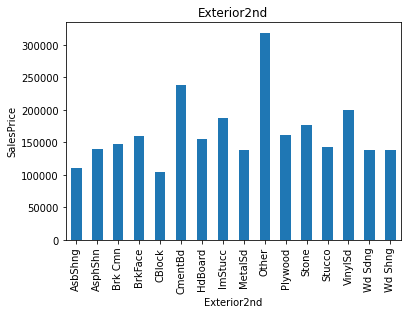

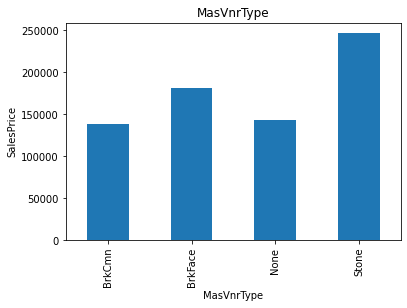

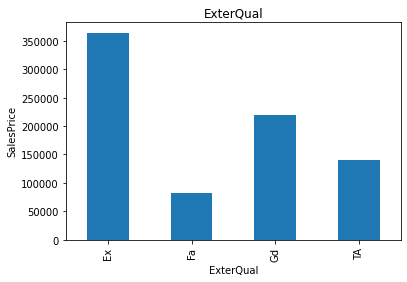

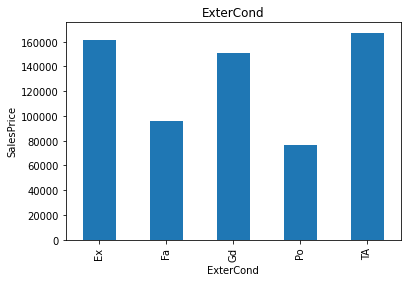

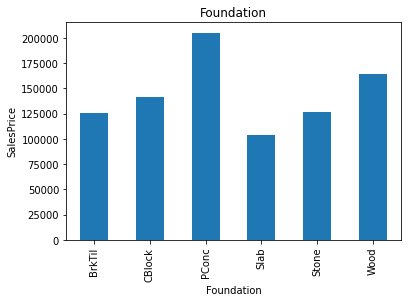

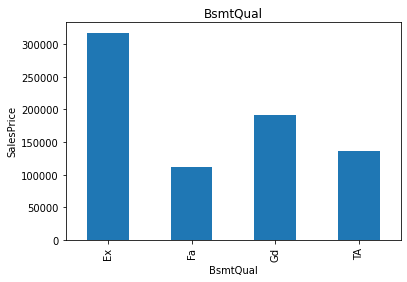

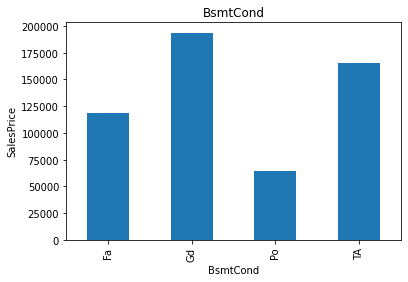

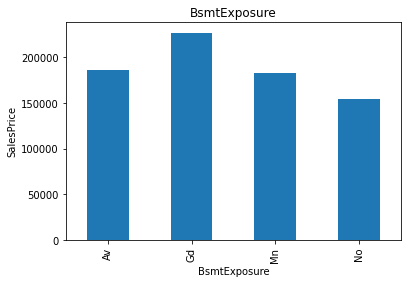

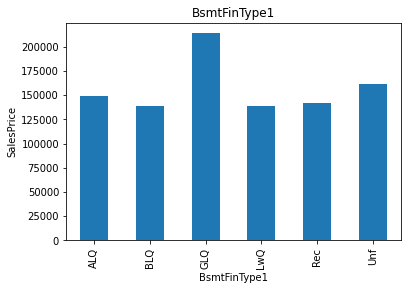

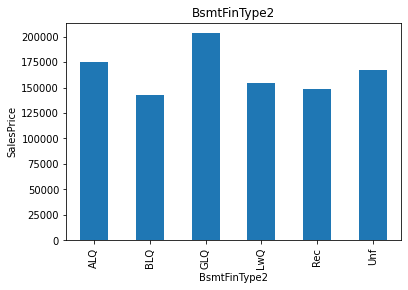

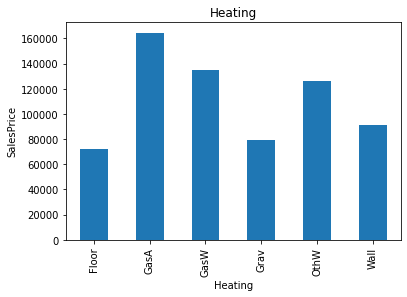

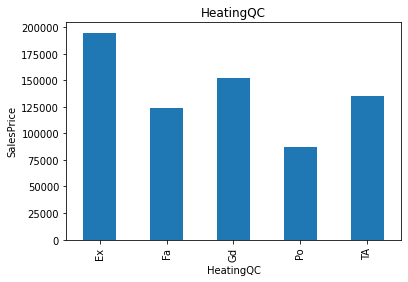

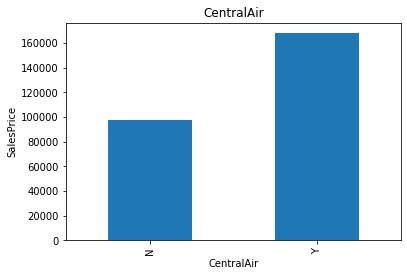

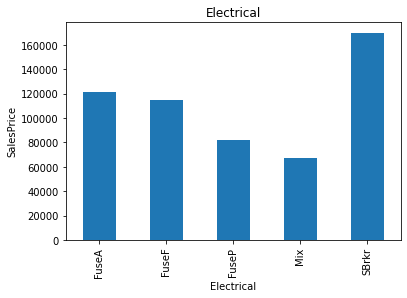

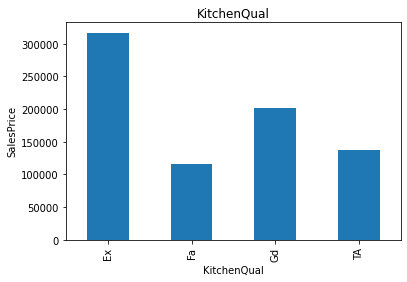

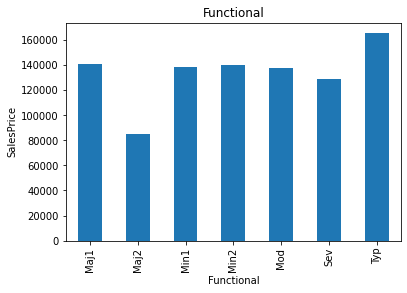

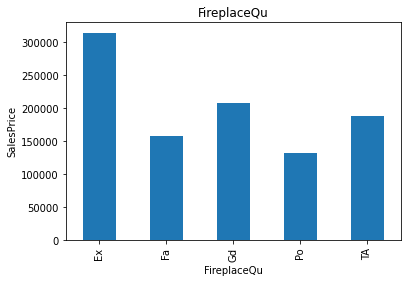

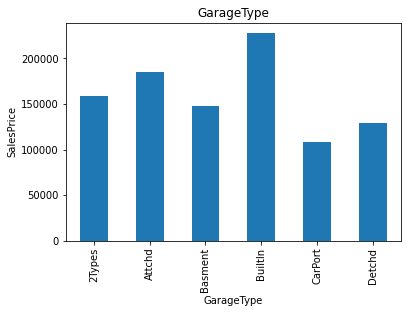

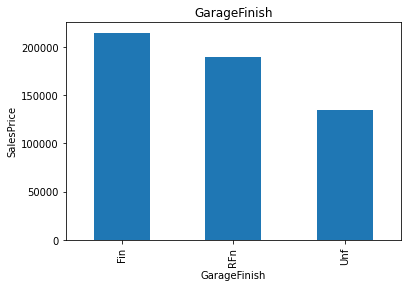

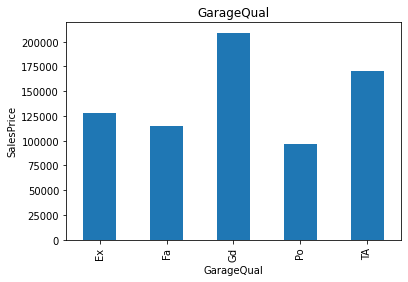

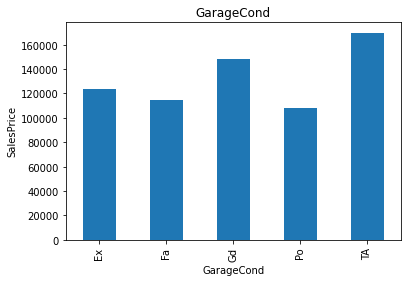

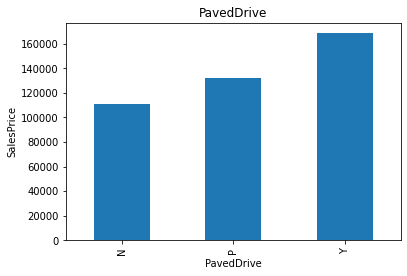

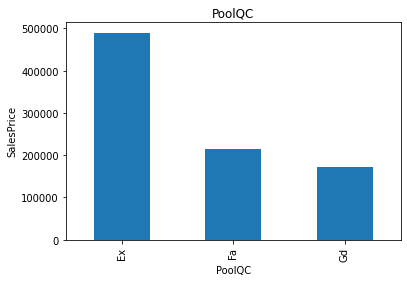

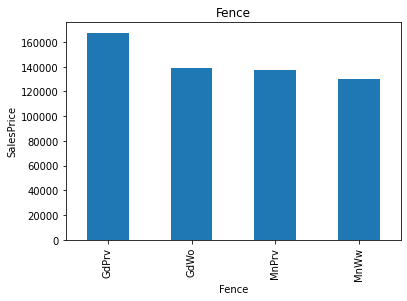

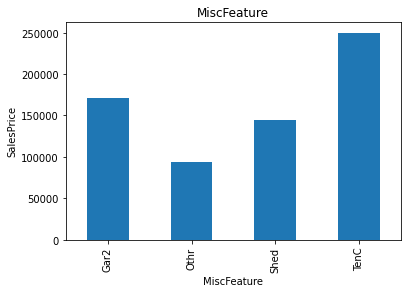

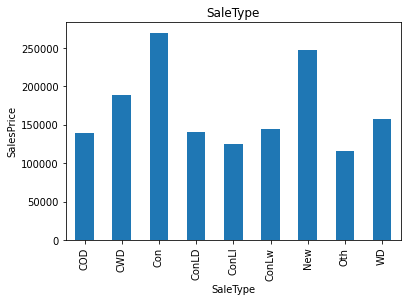

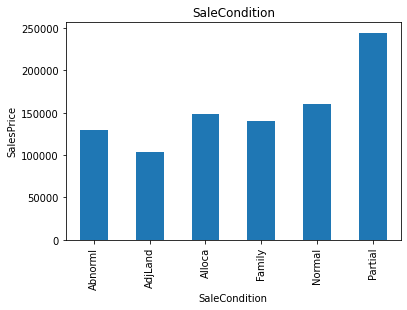

In [22]:

for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [24]:

dataset=df.copy()

In [25]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
dataset.shape

(1460, 81)

In [27]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [28]:
import io
df_Test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
# Dataset is now stored in a Pandas Dataframe

In [29]:
df_Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [30]:
df_Test.shape

(1459, 80)

In [31]:
final_df=pd.concat([dataset,df_Test],axis=0)

In [32]:
final_df.shape

(2919, 81)

In [33]:
final_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [34]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in final_df.columns if final_df[feature].isnull().sum()>1 and final_df[feature].dtypes=='O']

## Replace missing value with a new label
def replace_cat_feature(final_df,features_nan):
    data=final_df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

final_df=replace_cat_feature(final_df,features_nan)

In [35]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in final_df.columns if final_df[feature].dtypes!='O' and final_df[feature].isnull().sum()>1 and feature not in ['Id','SalePrice']]

In [36]:
numerical_with_nan

['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']

In [37]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=final_df[feature].median()
    
    ## create a new feature to capture nan values
    final_df[feature+'nan']=np.where(final_df[feature].isnull(),1,0)
    final_df[feature].fillna(median_value,inplace=True)

In [38]:
for features in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  final_df[features]= final_df["YrSold"]-final_df[features]

In [39]:
final_df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2919 non-null   int64  
 1   MSSubClass       2919 non-null   int64  
 2   MSZoning         2919 non-null   object 
 3   LotFrontage      2919 non-null   float64
 4   LotArea          2919 non-null   int64  
 5   Street           2919 non-null   object 
 6   Alley            2919 non-null   object 
 7   LotShape         2919 non-null   object 
 8   LandContour      2919 non-null   object 
 9   Utilities        2919 non-null   object 
 10  LotConfig        2919 non-null   object 
 11  LandSlope        2919 non-null   object 
 12  Neighborhood     2919 non-null   object 
 13  Condition1       2919 non-null   object 
 14  Condition2       2919 non-null   object 
 15  BldgType         2919 non-null   object 
 16  HouseStyle       2919 non-null   object 
 17  OverallQual   

In [41]:
categorical_features=[feature for feature in final_df.columns if final_df[feature].dtype=='O']

In [42]:

for feature in categorical_features:
    temp=final_df.groupby(feature)['SalePrice'].count()/len(final_df)
    
    temp_df=temp[temp>0.01].index
    
    final_df[feature]=np.where(final_df[feature].isin(temp_df),final_df[feature],'Rare_var')


In [43]:
   for feature in categorical_features:
    labels_ordered=final_df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    final_df[feature]=final_df[feature].map(labels_ordered)

In [44]:

final_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1,60,2,65.0,8450,1,2,0,1,1,0,0,11,2,1,4,5,7,5,5,5,0,0,6,6,2,196.0,2,2,3,3,3,1,6,706.0,4,0.0,150.0,856.0,1,4,1,2,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,3,0,0,3,5.0,2,2.0,548.0,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,2,208500.0,0,0,0,0,0
1,2,20,2,80.0,9600,1,2,0,1,1,1,0,8,1,1,4,4,6,8,31,31,0,0,1,1,0,0.0,1,2,2,3,3,4,4,978.0,4,0.0,284.0,1262.0,1,4,1,2,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,3,1,2,3,31.0,2,2.0,460.0,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,2,181500.0,0,0,0,0,0
2,3,60,2,68.0,11250,1,2,1,1,1,0,0,11,2,1,4,5,7,5,7,6,0,0,6,6,2,162.0,2,2,3,3,3,2,6,486.0,4,0.0,434.0,920.0,1,4,1,2,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,3,1,2,3,7.0,2,2.0,608.0,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,2,223500.0,0,0,0,0,0
3,4,70,2,60.0,9550,1,2,1,1,1,2,0,12,2,1,4,5,7,5,91,36,0,0,2,2,0,0.0,1,2,1,2,4,1,4,216.0,4,0.0,540.0,756.0,1,3,1,2,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,3,1,3,1,8.0,1,3.0,642.0,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,140000.0,0,0,0,0,0
4,5,60,2,84.0,14260,1,2,1,1,1,1,0,16,2,1,4,5,8,5,8,8,0,0,6,6,2,350.0,2,2,3,3,3,3,6,655.0,4,0.0,490.0,1145.0,1,4,1,2,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,3,1,2,3,8.0,2,3.0,836.0,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,2,250000.0,0,0,0,0,0
5,6,50,2,85.0,14115,1,2,1,1,1,0,0,6,2,1,4,1,5,5,16,14,0,0,6,6,0,0.0,1,2,0,3,3,1,6,732.0,4,0.0,64.0,796.0,1,4,1,2,796,566,0,1362,1.0,0.0,1,1,1,1,1,5,3,0,0,3,16.0,1,2.0,480.0,2,3,2,40,30,0,320,0,0,0,2,0,700,10,2009,2,2,143000.0,0,0,0,0,0
6,7,20,2,75.0,10084,1,2,0,1,1,0,0,13,2,1,4,4,8,5,3,2,0,0,6,6,3,186.0,2,2,3,4,3,3,6,1369.0,4,0.0,317.0,1686.0,1,4,1,2,1694,0,0,1694,1.0,0.0,2,0,3,1,2,7,3,1,3,3,3.0,2,2.0,636.0,2,3,2,255,57,0,0,0,0,0,4,2,0,8,2007,2,2,307000.0,0,0,0,0,0
7,8,60,2,68.0,10382,1,2,1,1,1,2,0,9,3,1,4,5,7,6,36,36,0,0,3,4,3,240.0,1,2,2,3,3,2,4,859.0,1,32.0,216.0,1107.0,1,4,1,2,1107,983,0,2090,1.0,0.0,2,1,3,1,1,7,3,2,2,3,36.0,2,2.0,484.0,2,3,2,235,204,228,0,0,0,0,4,0,350,11,2009,2,2,200000.0,1,0,0,0,0
8,9,50,1,51.0,6120,1,2,0,1,1,0,0,3,0,1,4,1,7,5,77,58,0,0,5,2,0,0.0,1,2,1,2,3,1,5,0.0,4,0.0,952.0,952.0,1,3,1,0,1022,752,0,1774,0.0,0.0,2,0,2,2,1,8,1,2,2,1,77.0,1,2.0,468.0,1,3,2,90,0,205,0,0,0,0,4,2,0,4,2008,2,0,129900.0,0,0,0,0,0
9,10,190,2,50.0,7420,1,2,0,1,1,2,0,1,0,0,0,2,5,6,69,58,0,0,1,1,0,0.0,1,2,1,2,3,1,6,851.0,4,0.0,140.0,991.0,1,4,1,2,1077,0,0,1077,1.0,0.0,1,0,2,2,1,5,3,2,2,3,69.0,2,1.0,205.0,3,3,2,0,4,0,0,0,0,0,4,2,0,1,2008,2,2,118000.0,0,0,0,0,0


In [45]:
#feature scaling 
feature_scale=[feature for feature in final_df.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(final_df[feature_scale])

MinMaxScaler()

In [46]:
scaler.transform(final_df[feature_scale])
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([final_df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(final_df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [47]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1,208500.0,0.235294,0.666667,0.150685,0.033420,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,1.0,1.0,0.666667,0.500,0.043796,0.112903,0.0,0.0,0.857143,0.857143,0.666667,0.12250,0.666667,1.0,1.000000,0.75,0.75,0.25,1.000000,0.125089,0.8,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.461538,1.0,0.00,0.00,0.75,0.652866,0.666667,0.4,0.368280,0.666667,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
1,2,181500.0,0.000000,0.666667,0.202055,0.038795,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.5000,0.333333,1.0,1.0,0.8,0.555556,0.875,0.233577,0.532258,0.0,0.0,0.142857,0.142857,0.000000,0.00000,0.333333,1.0,0.666667,0.75,0.75,1.00,0.666667,0.173281,0.8,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.25,0.307692,1.0,0.25,0.50,0.75,0.735669,0.666667,0.4,0.309140,0.666667,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
2,3,223500.0,0.235294,0.666667,0.160959,0.046507,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,1.0,1.0,0.666667,0.500,0.058394,0.129032,0.0,0.0,0.857143,0.857143,0.666667,0.10125,0.666667,1.0,1.000000,0.75,0.75,0.50,1.000000,0.086109,0.8,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.307692,1.0,0.25,0.50,0.75,0.659236,0.666667,0.4,0.408602,0.666667,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
3,4,140000.0,0.294118,0.666667,0.133562,0.038561,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.7500,0.666667,1.0,1.0,1.0,0.666667,0.500,0.671533,0.612903,0.0,0.0,0.285714,0.285714,0.000000,0.00000,0.333333,1.0,0.333333,0.50,1.00,0.25,0.666667,0.038271,0.8,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.50,0.384615,1.0,0.25,0.75,0.25,0.662420,0.333333,0.6,0.431452,0.666667,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0
4,5,250000.0,0.235294,0.666667,0.215753,0.060576,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.0000,0.666667,1.0,1.0,1.0,0.777778,0.500,0.065693,0.161290,0.0,0.0,0.857143,0.857143,0.666667,0.21875,0.666667,1.0,1.000000,0.75,0.75,0.75,1.000000,0.116052,0.8,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.50,0.538462,1.0,0.25,0.50,0.75,0.662420,0.666667,0.6,0.561828,0.666667,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0


In [48]:
df_Train=data.iloc[:1460,:]
df_Test=data.iloc[1460:,:]

In [49]:
df_Train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1,208500.0,0.235294,0.666667,0.150685,0.033420,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,1.0,1.0,0.666667,0.500,0.043796,0.112903,0.0,0.0,0.857143,0.857143,0.666667,0.12250,0.666667,1.0,1.000000,0.75,0.75,0.25,1.000000,0.125089,0.8,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.461538,1.0,0.00,0.00,0.75,0.652866,0.666667,0.4,0.368280,0.666667,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
1,2,181500.0,0.000000,0.666667,0.202055,0.038795,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.5000,0.333333,1.0,1.0,0.8,0.555556,0.875,0.233577,0.532258,0.0,0.0,0.142857,0.142857,0.000000,0.00000,0.333333,1.0,0.666667,0.75,0.75,1.00,0.666667,0.173281,0.8,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.25,0.307692,1.0,0.25,0.50,0.75,0.735669,0.666667,0.4,0.309140,0.666667,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
2,3,223500.0,0.235294,0.666667,0.160959,0.046507,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,1.0,1.0,0.666667,0.500,0.058394,0.129032,0.0,0.0,0.857143,0.857143,0.666667,0.10125,0.666667,1.0,1.000000,0.75,0.75,0.50,1.000000,0.086109,0.8,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.307692,1.0,0.25,0.50,0.75,0.659236,0.666667,0.4,0.408602,0.666667,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
3,4,140000.0,0.294118,0.666667,0.133562,0.038561,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.7500,0.666667,1.0,1.0,1.0,0.666667,0.500,0.671533,0.612903,0.0,0.0,0.285714,0.285714,0.000000,0.00000,0.333333,1.0,0.333333,0.50,1.00,0.25,0.666667,0.038271,0.8,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.50,0.384615,1.0,0.25,0.75,0.25,0.662420,0.333333,0.6,0.431452,0.666667,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0
4,5,250000.0,0.235294,0.666667,0.215753,0.060576,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.0000,0.666667,1.0,1.0,1.0,0.777778,0.500,0.065693,0.161290,0.0,0.0,0.857143,0.857143,0.666667,0.21875,0.666667,1.0,1.000000,0.75,0.75,0.75,1.000000,0.116052,0.8,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.50,0.538462,1.0,0.25,0.50,0.75,0.662420,0.666667,0.6,0.561828,0.666667,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0


In [50]:
df_Test.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
1460,1461,NaN,0.000000,0.000000,0.202055,0.048246,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.3125,0.333333,1.0,1.00,0.8,0.444444,0.625,0.364964,0.822581,0.0,0.0,0.857143,0.857143,0.000000,0.0000,0.333333,1.0,0.666667,0.50,0.75,0.25,0.166667,0.082920,0.4,0.094364,0.115582,0.144354,1.0,0.50,1.0,1.0,0.118042,0.000000,0.0,0.105878,0.0,0.0,0.25,0.0,0.250,0.333333,0.25,0.230769,1.0,0.00,0.00,0.75,0.792994,0.333333,0.2,0.490591,0.666667,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.5,1.0,0.000000,0.454545,1.0,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
1461,1462,NaN,0.000000,0.666667,0.205479,0.060609,1.0,1.0,0.333333,0.333333,1.0,0.5,0.0,0.3125,0.666667,1.0,1.00,0.8,0.555556,0.625,0.386861,0.870968,1.0,0.0,0.285714,0.000000,0.666667,0.0675,0.333333,1.0,0.666667,0.50,0.75,0.25,0.666667,0.163536,0.8,0.000000,0.173801,0.217512,1.0,0.50,1.0,1.0,0.208990,0.000000,0.0,0.187453,0.0,0.0,0.25,0.5,0.375,0.333333,0.50,0.307692,1.0,0.00,0.00,0.75,0.802548,0.333333,0.2,0.209677,0.666667,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,1.0,0.5,0.735294,0.454545,1.0,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
1462,1463,NaN,0.235294,0.666667,0.181507,0.058566,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.6250,0.666667,1.0,1.00,1.0,0.444444,0.500,0.102190,0.225806,0.0,0.0,0.857143,0.857143,0.000000,0.0000,0.333333,1.0,1.000000,0.75,0.75,0.25,1.000000,0.140149,0.8,0.000000,0.058647,0.151882,1.0,0.75,1.0,1.0,0.124764,0.339467,0.0,0.243971,0.0,0.0,0.50,0.5,0.375,0.333333,0.25,0.307692,1.0,0.25,0.50,0.75,0.678344,1.000000,0.4,0.323925,0.666667,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.000000,0.181818,1.0,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
1463,1464,NaN,0.235294,0.666667,0.195205,0.040562,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.6250,0.666667,1.0,1.00,1.0,0.555556,0.625,0.094891,0.225806,0.0,0.0,0.857143,0.857143,0.666667,0.0125,0.333333,1.0,1.000000,0.50,0.75,0.25,1.000000,0.106662,0.8,0.000000,0.138699,0.151555,1.0,1.00,1.0,1.0,0.124344,0.328329,0.0,0.239261,0.0,0.0,0.50,0.5,0.375,0.333333,0.50,0.384615,1.0,0.25,0.75,0.75,0.675159,1.000000,0.4,0.315860,0.666667,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.000000,0.454545,1.0,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
1464,1465,NaN,0.588235,0.666667,0.075342,0.017318,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.5000,0.666667,1.0,0.75,0.8,0.777778,0.500,0.138686,0.322581,0.0,0.0,0.428571,0.571429,0.000000,0.0000,0.666667,1.0,1.000000,0.75,0.75,0.25,0.666667,0.046598,0.8,0.000000,0.435360,0.209493,1.0,1.00,1.0,1.0,0.198698,0.000000,0.0,0.178222,0.0,0.0,0.50,0.0,0.250,0.333333,0.50,0.230769,1.0,0.00,0.00,0.75,0.694268,0.666667,0.4,0.340054,0.666667,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,1.0,1.0,0.000000,0.000000,1.0,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0


In [51]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:

X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [53]:
X_train.shape,y_train.shape

((1460, 85), (1460,))

In [54]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

[05:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [56]:
y_pred=classifier.predict(df_Test)

In [57]:
y_pred.round()

array([120665., 159103., 175331., ..., 160414., 120840., 225218.],
      dtype=float32)

In [58]:
pred=pd.DataFrame(y_pred)
from google.colab import files
uploaded = files.upload()
import io
sub_df = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
datasets=pd.concat([sub_df["Id"],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv("Sample_submission.csv",index=False)

Saving sample_submission.csv to sample_submission.csv


In [103]:
#x g boost regressor Tuning

In [119]:
import xgboost
classifier=xgboost.XGBRegressor()

In [120]:

import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [121]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']  
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [122]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,      
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [123]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[06:54:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [127]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [128]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [129]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [130]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900, silent=True)

In [131]:
y_pred2=regressor.predict(df_Test)

In [132]:
pred_tune=pd.DataFrame(y_pred2)
from google.colab import files
uploaded = files.upload()
import io
sub_df = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
datasets=pd.concat([sub_df["Id"],pred_tune],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv("Sample_submission_tuning.csv",index=False)

Saving sample_submission.csv to sample_submission (4).csv


In [135]:
#feature selection

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [136]:

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function


In [137]:
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [149]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True])

In [139]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))



total features: 85
selected features: 83
features with coefficients shrank to zero: 2


In [155]:
len(selected_feat)

83

In [141]:
X_train=X_train[selected_feat]

In [142]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900, silent=True)

In [143]:
y_pred3=classifier.predict(df_Test)

In [144]:
pred_tune2=pd.DataFrame(y_pred3)
from google.colab import files
uploaded = files.upload()
import io
sub_df = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
datasets=pd.concat([sub_df["Id"],pred_tune],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv("Sample_submission_tuning_2.csv",index=False)

Saving sample_submission.csv to sample_submission (5).csv


In [ ]:
#Feature reduction by correlation:

In [152]:
corr=df_Train.corr()

In [157]:
#df_Train.corr().style.background_gradient(cmap='viridis')

In [146]:
columns=np.full((corr.shape[0],),True,dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1,corr.shape[0]):
    if corr.iloc[i,j]>=0.9:
      if columns[j]:
        columns[j]=False

In [147]:
selected_columns=df_Train.columns[columns]
data=df_Train[selected_columns]

In [151]:
len(selected_columns)

85